# Load Data

In [1]:
from glob import glob
import os, json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
sns.set_style("whitegrid")
sns.color_palette("Set2")

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

# Experiment 1

In [3]:
fold_list = glob('results/room2_pot3_*')
fold_list  += glob('results/room2_pot7_*')
print('Num Results:', len(fold_list)) 

data = {"Params": [], "Seed": [], "Fitness": [], "Type": [], "Count":[]}

for directory in fold_list:
    with open(os.path.join(directory, 'parameters.json')) as f:
        obj = json.load(f)
        seed = obj['seed']
        params = '$C$=' + str(obj['room_count'])+ \
                 ' $B_2$='+ str(obj['pot_count']) + '\n' + \
                 '$B_3$='+ str(obj['dish_count'])  + \
                 ' $B_4$='+ str(obj['onion_count'])


        
    with open(os.path.join(directory, 'best_chromosome.json')) as f:
        obj = json.load(f)

        data['Seed'].append(seed)
        data['Params'].append(params)
        data['Fitness'].append(obj['fitness'])        
        data['Type'].append('Rooms')        
        data['Count'].append(obj['room_count'])
        
#         data['Seed'].append(seed)
#         data['Params'].append(params)
#         data['Fitness'].append(obj['fitness'])    
#         data['Type'].append('Empty Block')
#         data['Count'].append(obj['block_0'])
        
#         data['Seed'].append(seed)
#         data['Params'].append(params)
#         data['Fitness'].append(obj['fitness'])  
#         data['Type'].append('Wall Block')
#         data['Count'].append(obj['block_1'])
        
        data['Seed'].append(seed)
        data['Params'].append(params)
        data['Fitness'].append(obj['fitness'])  
        data['Type'].append('Pot Block')
        data['Count'].append(obj['block_2'])
        
        data['Seed'].append(seed)
        data['Params'].append(params)
        data['Fitness'].append(obj['fitness'])  
        data['Type'].append('Dish Block')
        data['Count'].append(obj['block_3'])
        
        data['Seed'].append(seed)
        data['Params'].append(params)
        data['Fitness'].append(obj['fitness'])  
        data['Type'].append('Onion Block')
        data['Count'].append(obj['block_4'])
        
#         data['Seed'].append(seed)
#         data['Params'].append(params)
#         data['Fitness'].append(obj['fitness'])  
#         data['Type'].append('Outlet Block')
#         data['Count'].append(obj['block_5'])

Num Results: 300


In [4]:
def get_order(x):
    order_dict = {'Rooms': 0, 'Pot Block': 1, 'Onion Block': 3, 'Dish Block': 2}
    return order_dict[x]
def is_highlight(x):
    return True


df = pd.DataFrame(data)

order_keys = []
for idx, row in df.iterrows():
    order_keys.append(get_order(row.Type))
df['TypeOrder'] = order_keys

is_highlighted = []
for idx, row in df.iterrows():
    is_highlighted.append(is_highlight(row.Type))
df['Highlight'] = is_highlighted

df = df.sort_values(by=['Params', 'TypeOrder'])
df

,Params,Seed,Fitness,Type,Count,TypeOrder,Highlight
0,$C$=2 $B_2$=3\n$B_3$=3 $B_4$=3,73,-0.166667,Rooms,2,0,True
8,$C$=2 $B_2$=3\n$B_3$=3 $B_4$=3,87,-0.416667,Rooms,2,0,True
12,$C$=2 $B_2$=3\n$B_3$=3 $B_4$=3,80,-0.083333,Rooms,2,0,True
20,$C$=2 $B_2$=3\n$B_3$=3 $B_4$=3,74,-0.333333,Rooms,2,0,True
24,$C$=2 $B_2$=3\n$B_3$=3 $B_4$=3,89,-0.141421,Rooms,2,0,True
...,...,...,...,...,...,...,...
1183,$C$=2 $B_2$=7\n$B_3$=7 $B_4$=7,82,-0.035714,Onion Block,7,3,True
1187,$C$=2 $B_2$=7\n$B_3$=7 $B_4$=7,76,0.000000,Onion Block,7,3,True
1191,$C$=2 $B_2$=7\n$B_3$=7 $B_4$=7,40,0.000000,Onion Block,7,3,True
1195,$C$=2 $B_2$=7\n$B_3$=7 $B_4$=7,78,0.000000,Onion Block,7,3,True


['//', '//', '//', '', '', '', '', '', '', '', '', '']


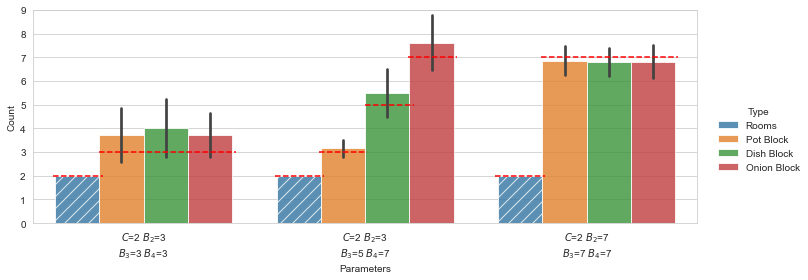

<Figure size 432x288 with 0 Axes>

In [188]:
g = sns.catplot(
    data=df, kind="bar",
    x="Params", y="Count", hue="Type",
    ci="sd", alpha=.8, height=4, aspect=2.5,
    legend_out=True
)
g.despine(left=True)
g.set_axis_labels("Parameters", "Count")
# g.add_legend(label_order=['Rooms', 'Pot Block', 'Onion Block', 'Dish Block'], loc='upper left')
plt.ylim(0, 9)
plt.tight_layout()
sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)

hatches = ['//', '//', '//'] + [''] * 9
print(hatches)
# Loop over the bars
for i,thisbar in enumerate(g.ax.patches):
    thisbar.set_hatch(hatches[i])
    
g.map(plt.axhline, y=2,xmin=0.03, xmax=0.105, ls='--', c='r')
g.map(plt.axhline, y=3,xmin=0.100, xmax=0.305, ls='--', c='r')


g.map(plt.axhline, y=2,xmin=0.365, xmax=0.438, ls='--', c='r')
g.map(plt.axhline, y=3, xmin=0.365+0.065, xmax=0.438+0.065, ls='--', c='r')
g.map(plt.axhline, y=5, xmin=0.365+0.135, xmax=0.438+0.135, ls='--', c='r')
g.map(plt.axhline, y=7, xmin=0.365+0.200, xmax=0.438+0.200, ls='--', c='r')

g.map(plt.axhline, y=2,xmin=0.03+0.665, xmax=0.105+0.665, ls='--', c='r')
g.map(plt.axhline, y=7,xmin=0.100+0.665, xmax=0.305+0.665, ls='--', c='r')


plt.savefig('controllable.svg', dpi=300)

plt.show()
plt.clf()